In [51]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

df = pd.read_csv('wdbc.csv')

print(df['Diagnosis'].unique())

df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

print(df['Diagnosis'].unique())

['M' 'B']
[1 0]


C:\Users\aless\AppData\Local\Temp\ipykernel_29852\3450128927.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr.values , y=high_corr.index, palette='coolwarm')


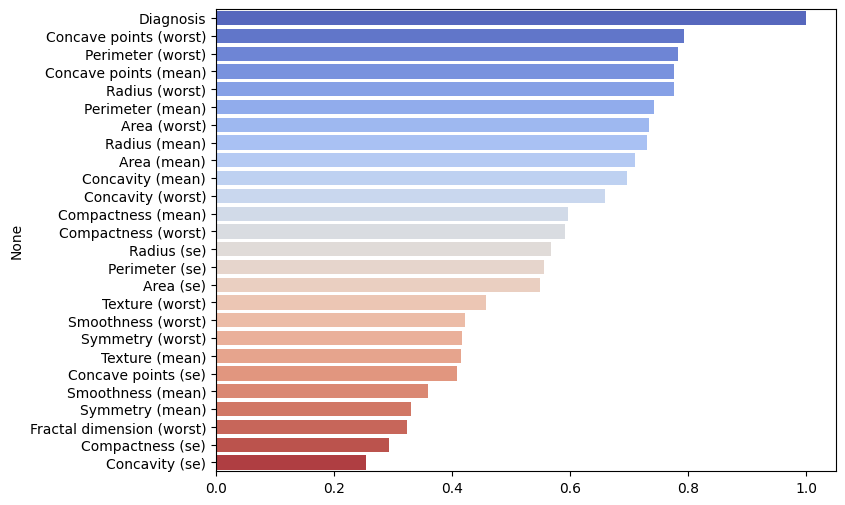

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix  = df.corr()['Diagnosis'].sort_values(ascending=False)

high_corr = correlation_matrix[abs(correlation_matrix) > 0.2]


plt.figure(figsize=(8, 6))
sns.barplot(x=high_corr.values , y=high_corr.index, palette='coolwarm')
plt.show()

In [53]:
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = XGBClassifier() 

In [56]:
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Numero di alberi
    'max_depth': np.arange(3, 10),           # Profondità degli alberi
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasso di apprendimento
    'subsample': [0.6, 0.8, 1.0],            # Percentuale di dati usata per ogni albero
    'colsample_bytree': [0.6, 0.8, 1.0],     # Percentuale di feature usate per ogni albero
    'gamma': [0, 0.1, 0.2, 0.3],             # Parametro di regolarizzazione per ridurre l'overfitting
    'reg_alpha': [0, 0.1, 0.5],              # L1 regolarizzazione
    'reg_lambda': [1, 1.5, 2]                # L2 regolarizzazione
}

In [57]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=100,  
                                   scoring='accuracy',
                                   cv=5,  
                                   random_state=42,
                                   n_jobs=-1) 

In [58]:
#model.fit(X_train, y_train)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [59]:
y_pred = random_search.predict(X_test)

In [60]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

